In [22]:
import roadvision3d
import yaml
import os
import numpy as np
import torch

from roadvision3d.src.datasets.dair_kitti import DAIR_KITTI
from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.datasets.kitti_utils import get_objects_from_label

from inference import inference_on_dataset


from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes



%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/dair_kitti.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
data = DAIR_KITTI(split='train', cfg=cfg['dataset'])


Resolution init: [1920 1088]


In [24]:
data_id = 648
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

In [25]:
def get_pitch(transformation_matrix):
    """
    Extracts the Euler angles from a 4x4 transformation matrix.
    
    Args:
    - transformation_matrix (numpy.array): 4x4 transformation matrix

    Returns:
    - roll, pitch, yaw (floats): Euler angles in radians
    """
    # Converting the list to a 3x4 numpy array first
    matrix_3x4 = np.array(transformation_matrix).reshape(3, 4)

    # Appending the row [0, 0, 0, 1] at the bottom to make it a 4x4 matrix
    transformation_matrix = np.vstack([matrix_3x4, [0, 0, 0, 1]])
    assert transformation_matrix.shape == (4, 4), "Matrix must be 4x4"
    
    # Extract 3x3 rotation matrix from the 4x4 transformation matrix
    R = transformation_matrix[:3, :3]
    
    # Pitch
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2)) + np.pi/2
    return pitch

camera_pitch = get_pitch(calib.V2C)


print('Pitch = ', camera_pitch)


Pitch =  0.22708588501113747


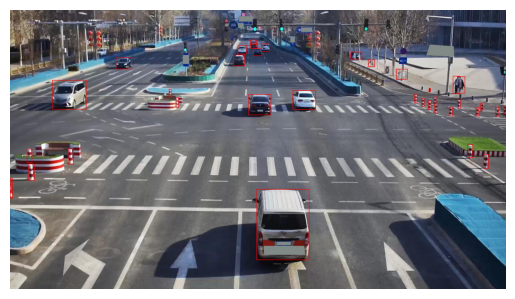

In [26]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7FC82FBA0970>


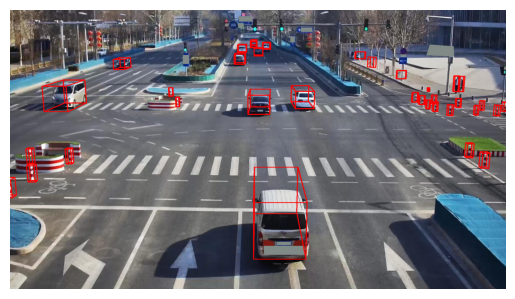

In [27]:
img_3d = img.copy()
print(img_3d)
draw_3d_bboxes(img_3d, labels, calib, pitch=camera_pitch)

## Eval results

Resolution init: [1920 1088]


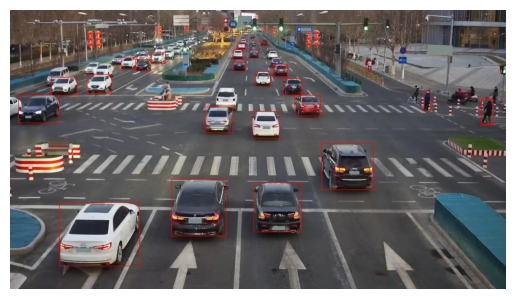

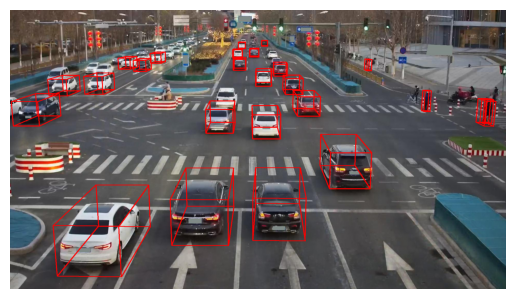

In [35]:
id_test = 1

labels_test_path = f'/home/javier/pytorch/RoadVision3D/work_dirs/VEHITS/MonoLSS_dair_GOOD/testset_out/checkpoint_epoch_150/data/{id_test:06d}.txt'

labels_test = get_objects_from_label(labels_test_path)

data_test = DAIR_KITTI(split='test', cfg=cfg['dataset'])
img_test = data_test.get_image(id_test)

img_2d_test = img_test.copy()
draw_2d_bboxes(img_2d_test, labels_test)
img_3d_test = img_test.copy()
draw_3d_bboxes(img_3d_test, labels_test, calib, pitch=camera_pitch)